In [55]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
pip install numpy

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:

df=pd.read_csv("machine_data.csv")

In [59]:
df.head()

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Reason
0,1106,1107,P01107,L,289.050057,295.701857,896,92.331805,155,TWF
1,4670,4671,P04671,H,297.002073,299.082002,1423,38.797158,232,OSF
2,6800,6801,P06801,H,299.326061,298.995897,2057,49.286354,47,normal
3,207,208,P00208,M,293.844446,289.478196,1495,66.301537,304,TWF
4,1715,1716,P01716,L,278.198507,287.059245,1197,88.847486,371,HDF


In [60]:
df.shape

(7998, 10)

In [61]:
df.columns

Index(['Unnamed: 0', 'UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Reason'],
      dtype='object')

In [62]:
df['Reason'].value_counts()

,count
Reason,
TWF,1333
OSF,1333
normal,1333
HDF,1333
PWF,1333
RNF,1333


In [63]:
df['Type'].value_counts()

,count
Type,
H,2691
L,2690
M,2617


In [64]:
df.duplicated().sum()

np.int64(0)

In [65]:
df.isnull().sum()

,0
Unnamed: 0,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Reason,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               7998 non-null   int64  
 1   UDI                      7998 non-null   int64  
 2   Product ID               7998 non-null   object 
 3   Type                     7998 non-null   object 
 4   Air temperature [K]      7998 non-null   float64
 5   Process temperature [K]  7998 non-null   float64
 6   Rotational speed [rpm]   7998 non-null   int64  
 7   Torque [Nm]              7998 non-null   float64
 8   Tool wear [min]          7998 non-null   int64  
 9   Reason                   7998 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 625.0+ KB


In [67]:
df.describe()

,Unnamed: 0,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,7998.00000,7998.00000,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000
mean,3998.50000,3999.50000,285.481493,290.450939,1427.710678,61.554109,230.722431
std,2308.96806,2308.96806,10.263112,10.322956,632.286255,22.895353,115.506671
min,0.00000,1.00000,265.008348,270.016285,500.000000,10.036707,0.000000
25%,1999.25000,2000.25000,277.362998,282.677313,959.000000,44.755850,171.000000
50%,3998.50000,3999.50000,285.063431,290.039296,1242.000000,63.139707,252.000000
75%,5997.75000,5998.75000,292.906756,297.735937,1878.750000,79.080789,315.000000
max,7997.00000,7998.00000,309.992932,314.999102,2999.000000,109.978853,449.000000


In [68]:
# df=df.drop(columns=['Product ID'])
df=df.drop(columns=['Unnamed: 0'])

In [69]:
numerical_columns = ['Air temperature [K]', 'Process temperature [K]',
                     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

categorical_columns = ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])


In [71]:
df['Reason'] = label_encoder.fit_transform(df['Reason'])


In [72]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('Label Mapping:', label_mapping)

Label Mapping: {'HDF': np.int64(0), 'OSF': np.int64(1), 'PWF': np.int64(2), 'RNF': np.int64(3), 'TWF': np.int64(4), 'normal': np.int64(5)}


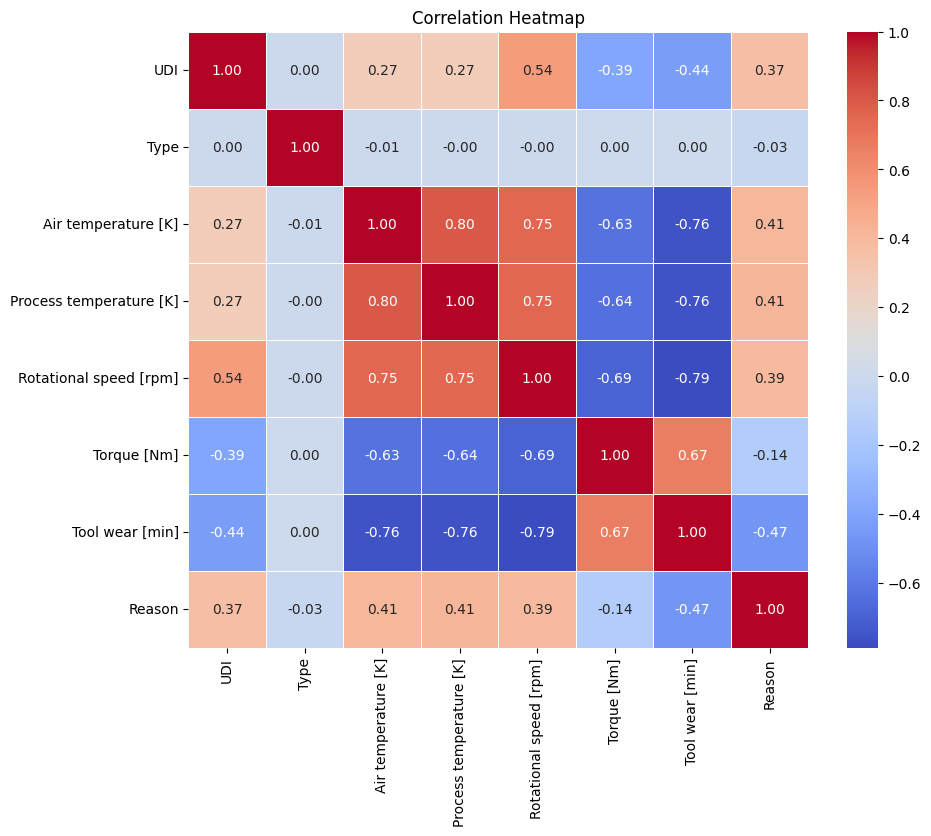

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-74-dd8f8b5c6aa7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Type'], palette='Set2')


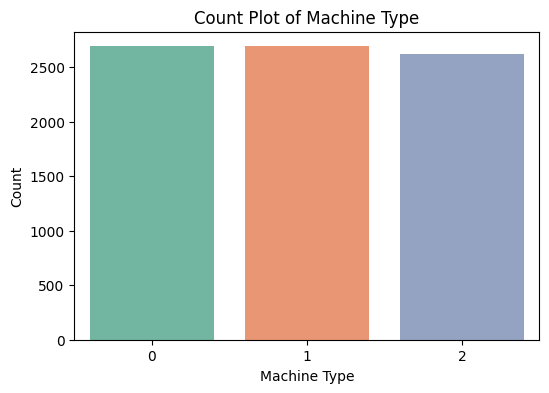

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

sns.countplot(x=df['Type'], palette='Set2')

plt.title('Count Plot of Machine Type')
plt.xlabel('Machine Type')
plt.ylabel('Count')

plt.show()


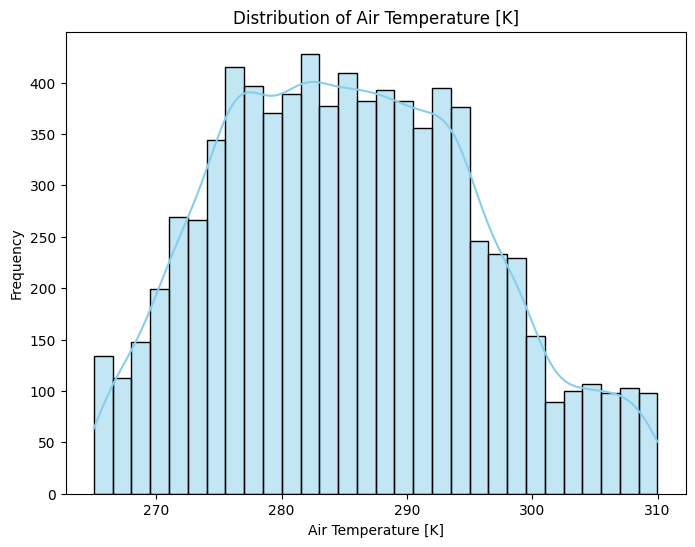

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Air temperature [K]'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Air Temperature [K]')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Frequency')
plt.show()



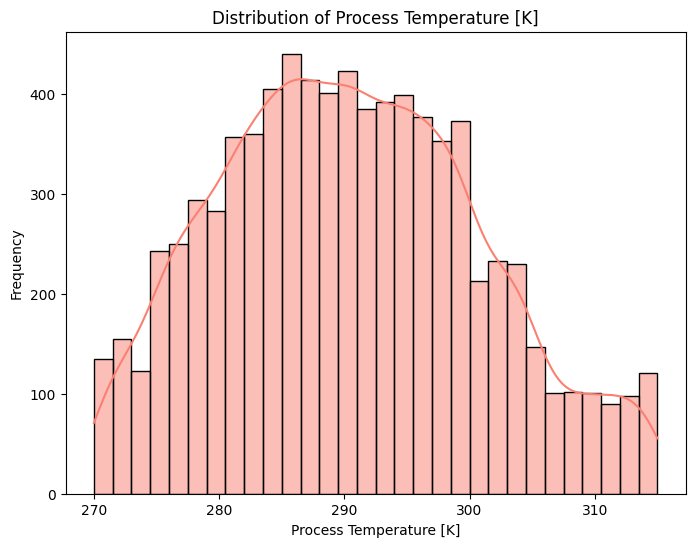

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Process temperature [K]'], kde=True, color='salmon', bins=30)
plt.title('Distribution of Process Temperature [K]')
plt.xlabel('Process Temperature [K]')
plt.ylabel('Frequency')
plt.show()





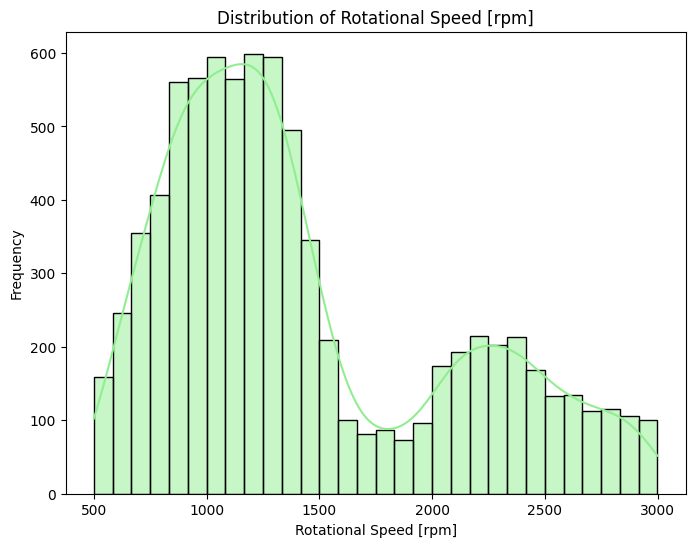

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rotational speed [rpm]'], kde=True, color='lightgreen', bins=30)
plt.title('Distribution of Rotational Speed [rpm]')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Frequency')
plt.show()



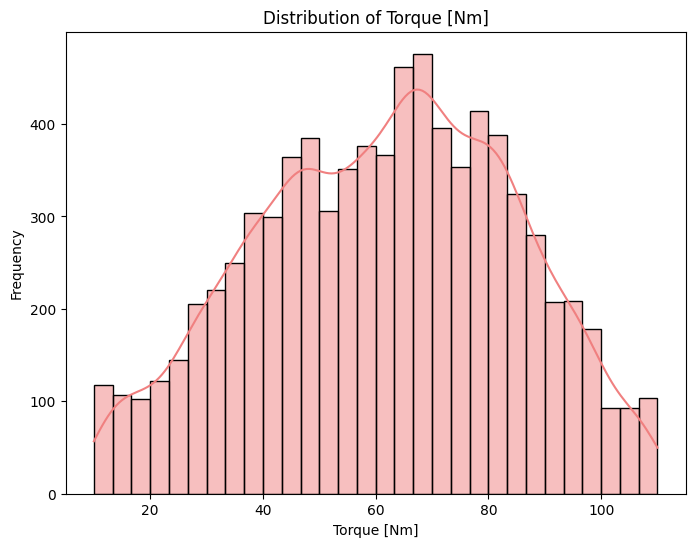

In [78]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Torque [Nm]'], kde=True, color='lightcoral', bins=30)
plt.title('Distribution of Torque [Nm]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequency')
plt.show()



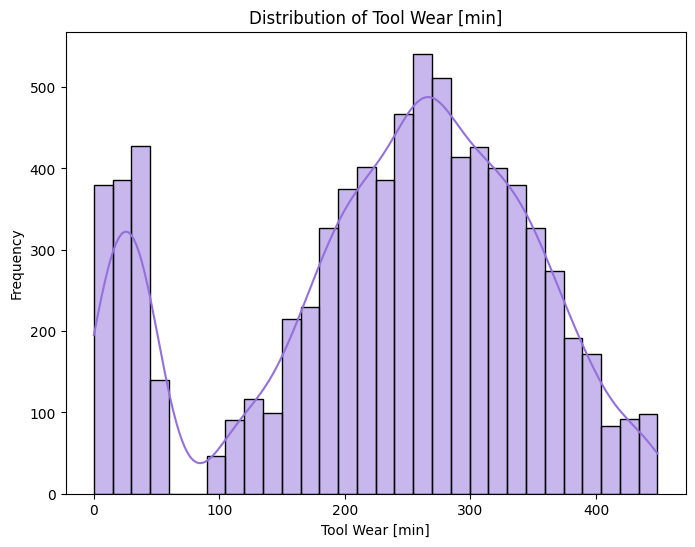

In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Tool wear [min]'], kde=True, color='mediumpurple', bins=30)
plt.title('Distribution of Tool Wear [min]')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Frequency')
plt.show()

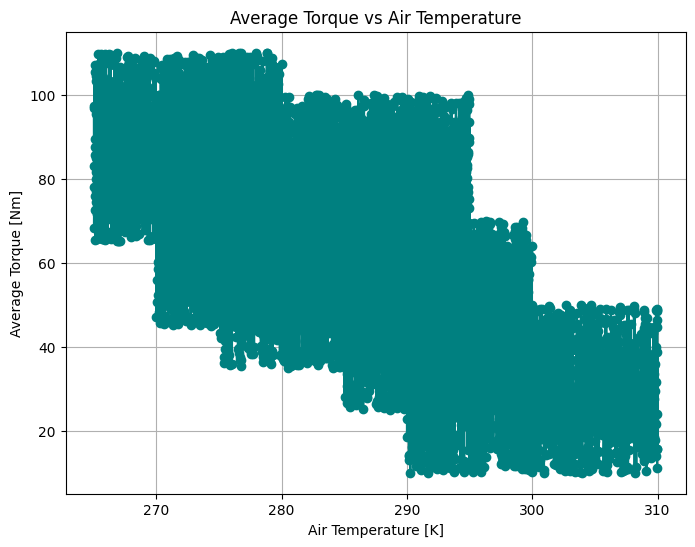

In [80]:
plt.figure(figsize=(8, 6))
avg_torque = df.groupby('Air temperature [K]')['Torque [Nm]'].mean()
plt.plot(avg_torque.index, avg_torque.values, marker='o', linestyle='-', color='teal')
plt.title('Average Torque vs Air Temperature')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Average Torque [Nm]')
plt.grid(True)
plt.show()


In [81]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Reason'],
      dtype='object')

<ipython-input-82-78d3d116e010>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')


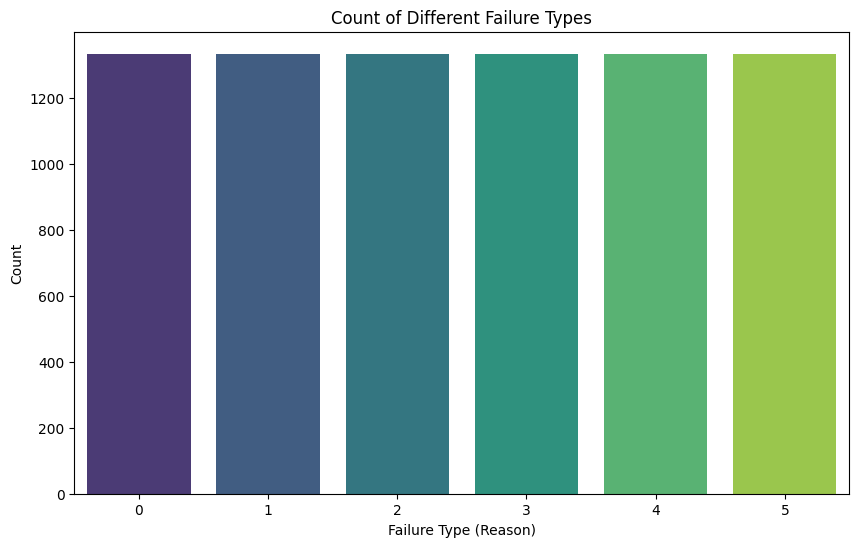

In [82]:
plt.figure(figsize=(10, 6))
failure_counts = df['Reason'].value_counts()
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')
plt.title('Count of Different Failure Types')
plt.xlabel('Failure Type (Reason)')
plt.ylabel('Count')
plt.show()


<ipython-input-83-99f1cd45dd77>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Air temperature [K]'], shade=True, color='blue', label='Air Temperature')
<ipython-input-83-99f1cd45dd77>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Process temperature [K]'], shade=True, color='green', label='Process Temperature')


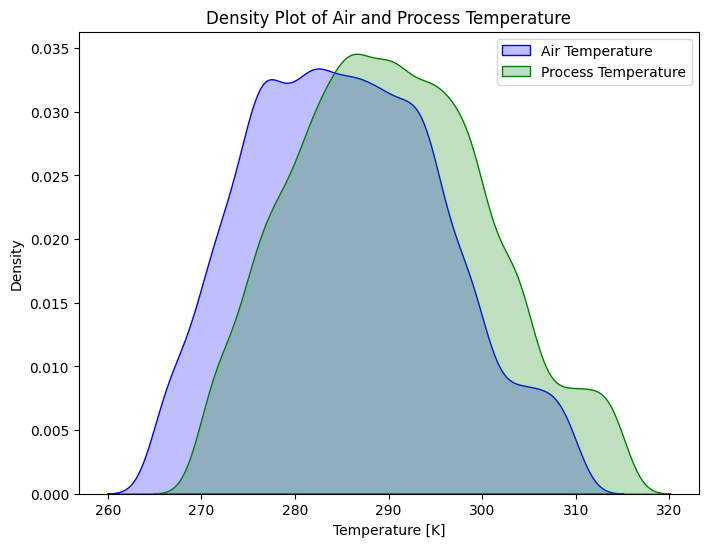

In [83]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Air temperature [K]'], shade=True, color='blue', label='Air Temperature')
sns.kdeplot(df['Process temperature [K]'], shade=True, color='green', label='Process Temperature')
plt.title('Density Plot of Air and Process Temperature')
plt.xlabel('Temperature [K]')
plt.ylabel('Density')
plt.legend()
plt.show()

In [84]:
df=pd.read_csv("machine_data.csv")
df.columns

Index(['Unnamed: 0', 'UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Reason'],
      dtype='object')

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Reason'] = label_encoder.fit_transform(df['Reason'])
df['Type'] = label_encoder.fit_transform(df['Type'])


In [86]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print('Label Mapping:', label_mapping)

Label Mapping: {'H': np.int64(0), 'L': np.int64(1), 'M': np.int64(2)}


In [87]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [88]:
pip install keras

In [89]:
df.head()

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Reason
0,1106,1107,P01107,1,289.050057,295.701857,896,92.331805,155,4
1,4670,4671,P04671,0,297.002073,299.082002,1423,38.797158,232,1
2,6800,6801,P06801,0,299.326061,298.995897,2057,49.286354,47,5
3,207,208,P00208,2,293.844446,289.478196,1495,66.301537,304,4
4,1715,1716,P01716,1,278.198507,287.059245,1197,88.847486,371,0


In [90]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# from sklearn.model_selection import train_test_split


# Normalize numerical columns
scaler = MinMaxScaler()
feature_cols = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Prepare input-output
X = df[feature_cols].values
y = df['Reason'].values

# Reshape X for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])  # 1 time step since no sequence data

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {acc:.4f}')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.3347 - loss: 1.6528 - val_accuracy: 0.6656 - val_loss: 0.7842
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7002 - loss: 0.7213 - val_accuracy: 0.7606 - val_loss: 0.5243
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7496 - loss: 0.5691 - val_accuracy: 0.7819 - val_loss: 0.4852
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7408 - loss: 0.5575 - val_accuracy: 0.7837 - val_loss: 0.4692
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7700 - loss: 0.5218 - val_accuracy: 0.7869 - val_loss: 0.4590
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7666 - loss: 0.5061 - val_accuracy: 0.7937 - val_loss: 0.4466
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7833 - loss: 0.4873 - val_accuracy: 0.8144 - val_loss: 0.4164
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7966 - loss: 0.4796 - val_accuracy:

In [91]:
# model.save("/content/drive/MyDrive/Machine/lstm_failure_model.h5")
# print("Model training complete and saved as 'lstm_failure_model.h5'")
# # Save the fitted scaler
import joblib

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [92]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Scaler has been successfully saved as scaler.pkl")


✅ Scaler has been successfully saved as scaler.pkl


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Model Evaluation Metrics:
Accuracy           : 0.8562
Precision (weighted): 0.8577
Recall (weighted)   : 0.8562
F1 Score (weighted) : 0.8537
Mean Absolute Error : 0.3306
Mean Squared Error  : 0.8056

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       231
           1       0.96      0.98      0.97       250
           2       0.77      0.59      0.67       277
           3       0.92      0.90      0.91       296
           4       0.79      0.92      0.85       272
           5       1.00      1.00      1.00       274

    accuracy                           0.86      1600
   macro avg       0.85      0.86      0.85      1600
weighted avg       0.86      0.86      0.85      1600



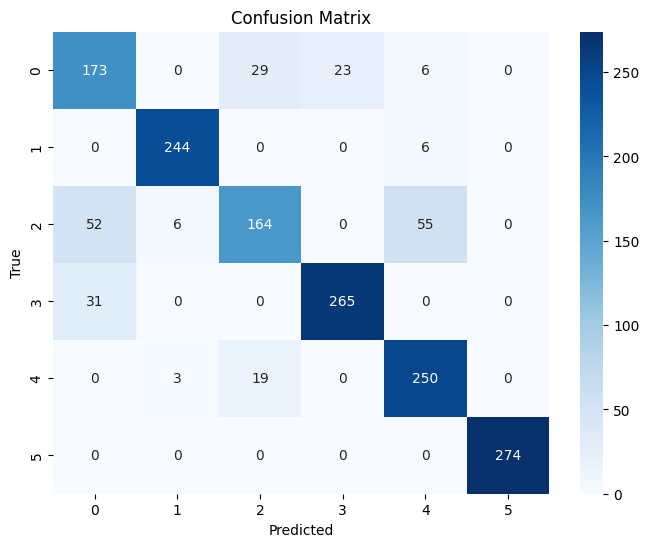

In [93]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Encode y_test
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Predict
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
acc = accuracy_score(y_test_encoded, y_pred_labels)
prec = precision_score(y_test_encoded, y_pred_labels, average='weighted')
rec = recall_score(y_test_encoded, y_pred_labels, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_labels, average='weighted')
mae = mean_absolute_error(y_test_encoded, y_pred_labels)
mse = mean_squared_error(y_test_encoded, y_pred_labels)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Accuracy           : {acc:.4f}")
print(f"Precision (weighted): {prec:.4f}")
print(f"Recall (weighted)   : {rec:.4f}")
print(f"F1 Score (weighted) : {f1:.4f}")
print(f"Mean Absolute Error : {mae:.4f}")
print(f"Mean Squared Error  : {mse:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_labels, target_names=[str(cls) for cls in label_encoder.classes_]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(cls) for cls in label_encoder.classes_],
            yticklabels=[str(cls) for cls in label_encoder.classes_])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [97]:
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load trained LSTM model
model = load_model('lstm_failure_model.h5')

# Load the MinMaxScaler used during training
scaler = joblib.load('scaler.pkl')

# Define encoding for 'Type' (machine type)
type_mapping = {'H': 0, 'L': 1, 'M': 2}
5

# {'HDF':(0), 'OSF':(1), 'PWF': (2), 'RNF':(3), 'TWF':(4), 'normal': (5)}
# Define decoding for 'Reason' (failure reasons)
reason_mapping = {
    0: 'HDF',  # Tool Wear Failure
    1: 'OSF',  # Heat Dissipation Failure
    2: 'PWF',  # Power Failure
    3: 'RNF',  # Overstrain Failure
    4: 'TWF',  # Random Failure
    5: 'Normal'  # No Failure
}

print("\n🔹 Enter machine parameters for prediction:")

# Get and encode 'Type'
while True:
    machine_type = input("🔹 Machine Type (L/H/M): ").strip().upper()
    if machine_type in type_mapping:
        machine_type_encoded = type_mapping[machine_type]
        break
    print("❌ Invalid Machine Type! Choose from: L, H, M")

# Get numerical inputs
try:
    air_temp = float(input("🌡 Air Temperature [K]: "))
    process_temp = float(input("🔥 Process Temperature [K]: "))
    rot_speed = int(input("🔄 Rotational Speed [rpm]: "))
    torque = float(input("⚙ Torque [Nm]: "))
    tool_wear = int(input("⏳ Tool Wear [min]: "))
except ValueError:
    print("❌ Invalid input! Please enter numerical values.")
    exit()

# Prepare user input (including 'Type') for scaling
user_features = np.array([[machine_type_encoded, air_temp, process_temp, rot_speed, torque, tool_wear]])

# Apply MinMaxScaler transformation (now including Type column)
user_features_scaled = scaler.transform(user_features)

# Reshape for LSTM (samples, time steps, features)
user_input_reshaped = user_features_scaled.reshape((1, 1, user_features_scaled.shape[1]))

# Model prediction
prediction = model.predict(user_input_reshaped)
predicted_reason_index = np.argmax(prediction)  # Get highest probability index

# Decode reason from mapping
predicted_reason_label = reason_mapping.get(predicted_reason_index, "Unknown")

print(f"\n✅ **Predicted Machine Wear-out Reason:** {predicted_reason_label}")




🔹 Enter machine parameters for prediction:
🔹 Machine Type (L/H/M): H
🌡 Air Temperature [K]: 299.3261
🔥 Process Temperature [K]: 298.9959
🔄 Rotational Speed [rpm]: 2057
⚙ Torque [Nm]: 49.28635
⏳ Tool Wear [min]: 47


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step

✅ **Predicted Machine Wear-out Reason:** Normal
